In [1]:
!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip install h5py==2.10.0
!pip install tensorflow==1.15.0
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.1.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 503 kB 53.5 MB/s 
     |████████████████████████████████| 3.8 MB 51.7 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=d0c83eb793f8f2e1e378ebaa614eee180b67bf41c276ac09cacf4e9f2546347c
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
 

In [2]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics

Using TensorFlow backend.


In [3]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
pd.unique(df.v1)

array(['ham', 'spam'], dtype=object)

In [6]:
d1 = {'spam': 1 , 'ham': 0}
df['v1'] = df['v1'].map(d1)

In [7]:
labels=np.asarray(df.v1)
texts=np.asarray(df.v2).astype('<U910')
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [8]:
maxlen = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
df = pad_sequences(sequences, maxlen=maxlen)
np.random.seed(42)

indices = np.arange(df.shape[0])
np.random.shuffle(indices)
df = df[indices]
clases = labels[indices]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, clases, test_size=0.2, shuffle=True)

In [10]:
max_features = 10000
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history_ltsm = model.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Train on 3565 samples, validate on 892 samples
Epoch 1/10


3565/3565 [==============================] - 56s 16ms/step - loss: 0.4259 - acc: 0.8519 - val_loss: 0.1720 - val_acc: 0.9372
Epoch 2/10
3565/3565 [==============================] - 25s 7ms/step - loss: 0.1138 - acc: 0.9759 - val_loss: 0.0816 - val_acc: 0.9821
Epoch 3/10
3565/3565 [==============================] - 25s 7ms/step - loss: 0.0504 - acc: 0.9919 - val_loss: 0.0626 - val_acc: 0.9843
Epoch 4/10
3565/3565 [==============================] - 24s 7ms/step - loss: 0.0278 - acc: 0.9958 - val_loss: 0.0631 - val_acc: 0.9843
Epoch 5/10
3565/3565 [==============================] - 24s 7ms/step - loss: 0.0157 - acc: 0.9969 - val_loss: 0.0524 - val_acc: 0.9865
Epoch 6/10
3565/3565 [==============================] - 24s 7ms/step - loss: 0.0098 - acc: 0.9992 - val_loss: 0.0555 - val_acc: 0.9888
Epoch 7/10
3565/3565 [==============================] - 25s 7ms/step - loss: 0.0053 - acc: 0.9994 - val_loss: 0.0561 - val_acc: 0.9865
Epoch 8/10
3565/3565 [==============================] - 26s 7ms/s

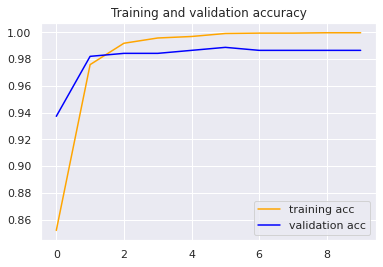

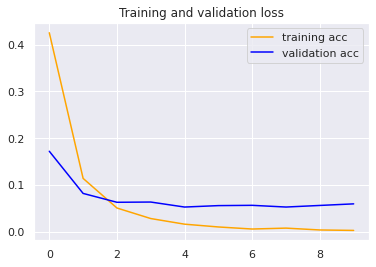

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
pred = model.predict_classes(X_test)
acc = model.evaluate(X_test, y_test)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
cm = confusion_matrix(pred, y_test)

1115/1115 [==============================] - 2s 2ms/step
Test loss is 0.03 accuracy is 0.99  


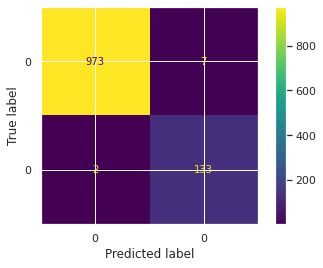

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()


In [15]:
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Precision:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))

Accuracy: 0.9919282511210762
Precision: 0.9851851851851852
Recall: 0.95


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
